# Lab 2

## PCA

In [1]:
import numpy as np
import time
from sklearn.datasets import make_classification
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.utils.vis_utils import plot_model
from sklearn.model_selection import train_test_split
from sklearn.decomposition import KernelPCA

In [2]:
# Load or create dataset with more than 2 dimensions
X, y = make_classification(n_features=6, n_classes=2, random_state=0, n_samples=100)

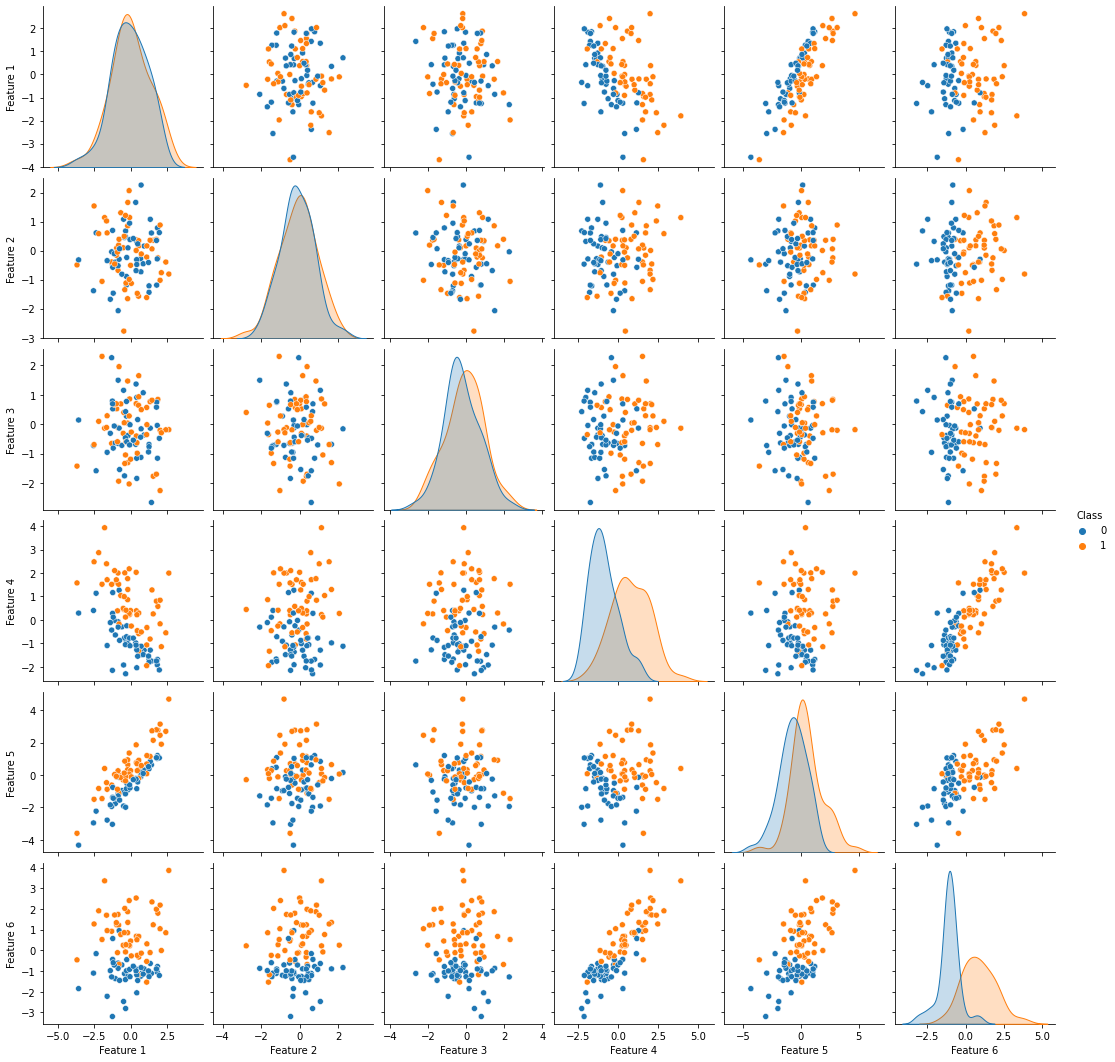

In [3]:
# Create a DataFrame from the dataset
df = pd.DataFrame(X, columns=["Feature 1", "Feature 2", "Feature 3", "Feature 4", "Feature 5", "Feature 6"])
df["Class"] = y

# Create a pairplot
sns.pairplot(df, hue="Class")

# Show the plot
plt.show()

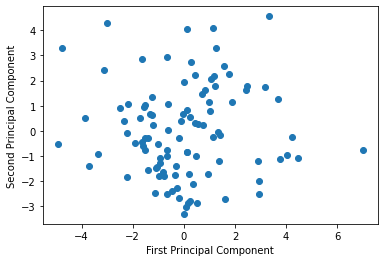

In [4]:
# Find the first 2 principal components with sklearn
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

# Plot the first two components
plt.scatter(X_pca[:, 0], X_pca[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Show the plot
plt.show()

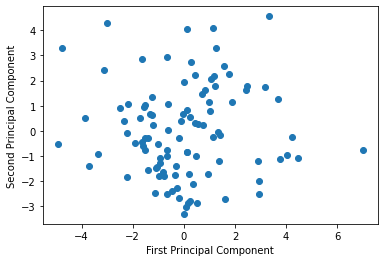

In [5]:
# Find the first 2 principal components without sklearn
import numpy as np

# Center the data
mean = np.mean(X, axis=0)
X_mean = X - mean

# Calculate the covariance matrix
cov = np.cov(X_mean, rowvar=False)

# Calculate the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eigh(cov)

# Sort the eigenvalues in decreasing order and sort the eigenvectors accordingly
idx = np.argsort(eigenvalues)[::-1]
eigenvalues = -eigenvalues[idx]
eigenvectors = -eigenvectors[:, idx]

# Select the first two eigenvectors
W = eigenvectors[:,0:2]

# Calculate the principal components
PC = np.dot(W.transpose(), X_mean.transpose()).transpose()

# Plot the first two components
plt.scatter(PC[:, 0], PC[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Show the plot
plt.show()


In [6]:
# PCA selecting two dimensions
print(np.shape(X_pca))
print(pca.explained_variance_ratio_)
print(round(pca.explained_variance_ratio_.sum(),4))

(100, 2)
[0.43959032 0.36544919]
0.805


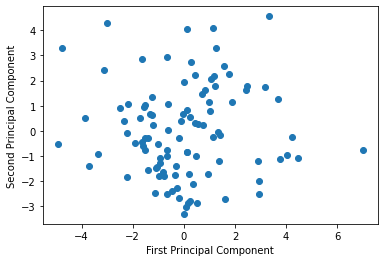

In [7]:
# Practice using PCA to preserve a certain percentage of variance
pca_90 = PCA(0.90, random_state=0) # 90% of the variance is preserved
X_pca_90 = pca_90.fit_transform(X)

# Plot the first two components
plt.scatter(X_pca_90[:, 0], X_pca_90[:, 1])
plt.xlabel("First Principal Component")
plt.ylabel("Second Principal Component")

# Show the plot
plt.show()

In [8]:
# PCA with 90% of variance from original data preserved
print(np.shape(X_pca_90))
print(pca_90.explained_variance_ratio_)
print(round(pca_90.explained_variance_ratio_.sum(),4))

(100, 3)
[0.43959032 0.36544919 0.10773044]
0.9128


# Generating dataset with 5000 instances to comapre training times

In [9]:
# Load or create dataset with more than 2 dimensions
X, y = make_classification(n_features=6, n_classes=2, random_state=0, n_samples=10000)

# Find the first 2 principal components with sklearn
pca = PCA(n_components=2, random_state=0)
X_pca = pca.fit_transform(X)

# Comparison of original and PCA dataset

In [10]:
# Original
print(np.shape(X))

# PCA reduced
print(np.shape(X_pca))

(10000, 6)
(10000, 2)


Same number of instances (5000), but one has 6 and the other one has 2 features

## NN Original dataset

In [11]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Initialize the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=32, activation="relu", input_dim=X_train.shape[1]))

# Add the output layer
model.add(Dense(units=1, activation="sigmoid"))

# Visualize the model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                224       
                                                                 
 dense_1 (Dense)             (None, 1)                 33        
                                                                 
Total params: 257
Trainable params: 257
Non-trainable params: 0
_________________________________________________________________


In [12]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Timer
start_time = time.time()

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=32, validation_data=(X_test, y_test))

# Print the training time
print(" %s seconds " % (time.time() - start_time))

# Evaluate the model on the test data
test_loss, test_accuracy_original = model.evaluate(X_test, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy_original)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5326 - accuracy: 0.7396 - val_loss: 0.4340 - val_accuracy: 0.8185
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4027 - accuracy: 0.8279 - val_loss: 0.4170 - val_accuracy: 0.8265
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3906 - accuracy: 0.8320 - val_loss: 0.4080 - val_accuracy: 0.8300
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3804 - accuracy: 0.8384 - val_loss: 0.3953 - val_accuracy: 0.8345
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3683 - accuracy: 0.8430 - val_loss: 0.3818 - val_accuracy: 0.8410
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3545 - accuracy: 0.8489 - val_loss: 0.3663 - val_accuracy: 0.8505
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3399 - accuracy: 0.8562 - val_loss: 0.3505 - val_accuracy: 0.8545

Epoch 58/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2234 - accuracy: 0.9139 - val_loss: 0.2301 - val_accuracy: 0.9100
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2231 - accuracy: 0.9137 - val_loss: 0.2308 - val_accuracy: 0.9090
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2230 - accuracy: 0.9139 - val_loss: 0.2306 - val_accuracy: 0.9105
Epoch 61/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9139 - val_loss: 0.2297 - val_accuracy: 0.9105
Epoch 62/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2228 - accuracy: 0.9145 - val_loss: 0.2297 - val_accuracy: 0.9135
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2224 - accuracy: 0.9141 - val_loss: 0.2288 - val_accuracy: 0.9130
Epoch 64/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2222 - accuracy: 0.9144 - val_loss: 0.2306 - val_accuracy:

## NN PCA dataset

In [13]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Find the first 2 principal components with sklearn
pca = PCA(n_components=2, random_state=0)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Initialize the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=32, activation="relu", input_dim=X_train_pca.shape[1]))

# Add the output layer
model.add(Dense(units=1, activation="sigmoid"))

# Visualize the model
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_2 (Dense)             (None, 32)                96        
                                                                 
 dense_3 (Dense)             (None, 1)                 33        
                                                                 
Total params: 129
Trainable params: 129
Non-trainable params: 0
_________________________________________________________________


In [14]:
# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Timer
start_time = time.time()

# Train the model
history = model.fit(X_train_pca, y_train, epochs=100, batch_size=32, validation_data=(X_test_pca, y_test))

# Print the training time
print(" %s seconds " % (time.time() - start_time))

# Evaluate the model on the test data
test_loss, test_accuracy_pca = model.evaluate(X_test_pca, y_test)

# Print the test accuracy
print("Test Accuracy:", test_accuracy_pca)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.4610 - accuracy: 0.8015 - val_loss: 0.4249 - val_accuracy: 0.8180
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.8306 - val_loss: 0.4106 - val_accuracy: 0.8285
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3830 - accuracy: 0.8364 - val_loss: 0.3977 - val_accuracy: 0.8315
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3689 - accuracy: 0.8424 - val_loss: 0.3815 - val_accuracy: 0.8435
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3534 - accuracy: 0.8475 - val_loss: 0.3623 - val_accuracy: 0.8490
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3362 - accuracy: 0.8564 - val_loss: 0.3437 - val_accuracy: 0.8550
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3194 - accuracy: 0.8629 - val_loss: 0.3260 - val_accuracy: 0.8640

Epoch 58/100
250/250 [==============================] - 0s 1000us/step - loss: 0.2245 - accuracy: 0.9131 - val_loss: 0.2266 - val_accuracy: 0.9125
Epoch 59/100
250/250 [==============================] - 0s 992us/step - loss: 0.2247 - accuracy: 0.9124 - val_loss: 0.2266 - val_accuracy: 0.9165
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2244 - accuracy: 0.9125 - val_loss: 0.2273 - val_accuracy: 0.9150
Epoch 61/100
250/250 [==============================] - 0s 996us/step - loss: 0.2247 - accuracy: 0.9139 - val_loss: 0.2269 - val_accuracy: 0.9135
Epoch 62/100
250/250 [==============================] - 0s 988us/step - loss: 0.2247 - accuracy: 0.9133 - val_loss: 0.2264 - val_accuracy: 0.9165
Epoch 63/100
250/250 [==============================] - 0s 988us/step - loss: 0.2240 - accuracy: 0.9137 - val_loss: 0.2284 - val_accuracy: 0.9135
Epoch 64/100
250/250 [==============================] - 0s 992us/step - loss: 0.2239 - accuracy: 0.9126 - val_loss: 0.2257 - 

# Test different PCA kernels

## NN PCA Linear

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform kernel PCA with a linear kernel
kpca = KernelPCA(kernel="linear", n_components=2)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Initialize the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=32, activation="relu", input_dim=X_train_kpca.shape[1]))

# Add the output layer
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_kpca, y_train, epochs=100, batch_size=32, validation_data=(X_test_kpca, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy_linear = model.evaluate(X_test_kpca, y_test)

# Print the test accuracy
print("Linear Kernel Test Accuracy:", test_accuracy_linear)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5031 - accuracy: 0.7759 - val_loss: 0.4238 - val_accuracy: 0.8135
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3941 - accuracy: 0.8313 - val_loss: 0.4087 - val_accuracy: 0.8260
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3818 - accuracy: 0.8375 - val_loss: 0.3968 - val_accuracy: 0.8335
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3696 - accuracy: 0.8434 - val_loss: 0.3828 - val_accuracy: 0.8435
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3558 - accuracy: 0.8524 - val_loss: 0.3639 - val_accuracy: 0.8520
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3400 - accuracy: 0.8589 - val_loss: 0.3472 - val_accuracy: 0.8540
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3247 - accuracy: 0.8664 - val_loss: 0.3304 - val_accuracy: 0.8650

Epoch 58/100
250/250 [==============================] - 0s 988us/step - loss: 0.2273 - accuracy: 0.9145 - val_loss: 0.2296 - val_accuracy: 0.9145
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2272 - accuracy: 0.9110 - val_loss: 0.2288 - val_accuracy: 0.9175
Epoch 60/100
250/250 [==============================] - 0s 976us/step - loss: 0.2264 - accuracy: 0.9131 - val_loss: 0.2311 - val_accuracy: 0.9130
Epoch 61/100
250/250 [==============================] - 0s 980us/step - loss: 0.2269 - accuracy: 0.9124 - val_loss: 0.2292 - val_accuracy: 0.9160
Epoch 62/100
250/250 [==============================] - 0s 976us/step - loss: 0.2266 - accuracy: 0.9145 - val_loss: 0.2286 - val_accuracy: 0.9175
Epoch 63/100
250/250 [==============================] - 0s 968us/step - loss: 0.2262 - accuracy: 0.9130 - val_loss: 0.2328 - val_accuracy: 0.9120
Epoch 64/100
250/250 [==============================] - 0s 976us/step - loss: 0.2272 - accuracy: 0.9135 - val_loss: 0.2307 - v

## NN PCA sigmoid

In [16]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform kernel PCA with a linear kernel
kpca = KernelPCA(kernel="sigmoid", n_components=2)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Initialize the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=32, activation="relu", input_dim=X_train_kpca.shape[1]))

# Add the output layer
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_kpca, y_train, epochs=100, batch_size=32, validation_data=(X_test_kpca, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy_sigmoid = model.evaluate(X_test_kpca, y_test)

# Print the test accuracy
print("Sigmoid Kernel Test Accuracy:", test_accuracy_sigmoid)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.5668 - accuracy: 0.7775 - val_loss: 0.4672 - val_accuracy: 0.8185
Epoch 2/100
250/250 [==============================] - 0s 980us/step - loss: 0.4155 - accuracy: 0.8286 - val_loss: 0.4162 - val_accuracy: 0.8210
Epoch 3/100
250/250 [==============================] - 0s 968us/step - loss: 0.3910 - accuracy: 0.8322 - val_loss: 0.4121 - val_accuracy: 0.8230
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3862 - accuracy: 0.8322 - val_loss: 0.4080 - val_accuracy: 0.8250
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3815 - accuracy: 0.8356 - val_loss: 0.4017 - val_accuracy: 0.8270
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8388 - val_loss: 0.3938 - val_accuracy: 0.8320
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3665 - accuracy: 0.8414 - val_loss: 0.3837 - val_accuracy: 0.

Epoch 58/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2258 - accuracy: 0.9095 - val_loss: 0.2284 - val_accuracy: 0.9105
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2255 - accuracy: 0.9100 - val_loss: 0.2277 - val_accuracy: 0.9110
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9115 - val_loss: 0.2277 - val_accuracy: 0.9120
Epoch 61/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2252 - accuracy: 0.9106 - val_loss: 0.2273 - val_accuracy: 0.9115
Epoch 62/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2238 - accuracy: 0.9115 - val_loss: 0.2280 - val_accuracy: 0.9085
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2245 - accuracy: 0.9110 - val_loss: 0.2270 - val_accuracy: 0.9120
Epoch 64/100
250/250 [==============================] - 0s 1ms/step - loss: 0.2235 - accuracy: 0.9126 - val_loss: 0.2261 - val_accuracy:

## NN PCA RBF

In [17]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Perform kernel PCA with a linear kernel
kpca = KernelPCA(kernel="rbf", n_components=2)
X_train_kpca = kpca.fit_transform(X_train)
X_test_kpca = kpca.transform(X_test)

# Initialize the model
model = Sequential()

# Add the first hidden layer
model.add(Dense(units=32, activation="relu", input_dim=X_train_kpca.shape[1]))

# Add the output layer
model.add(Dense(units=1, activation="sigmoid"))

# Compile the model
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

# Train the model
history = model.fit(X_train_kpca, y_train, epochs=100, batch_size=32, validation_data=(X_test_kpca, y_test))

# Evaluate the model on the test data
test_loss, test_accuracy_rbf = model.evaluate(X_test_kpca, y_test)

# Print the test accuracy
print("RBF Kernel Test Accuracy:", test_accuracy_rbf)

Epoch 1/100
250/250 [==============================] - 1s 2ms/step - loss: 0.6029 - accuracy: 0.7550 - val_loss: 0.5087 - val_accuracy: 0.8135
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4581 - accuracy: 0.8251 - val_loss: 0.4524 - val_accuracy: 0.8115
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4340 - accuracy: 0.8225 - val_loss: 0.4494 - val_accuracy: 0.8110
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4312 - accuracy: 0.8227 - val_loss: 0.4481 - val_accuracy: 0.8125
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4294 - accuracy: 0.8229 - val_loss: 0.4460 - val_accuracy: 0.8150
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4283 - accuracy: 0.8231 - val_loss: 0.4446 - val_accuracy: 0.8135
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8239 - val_loss: 0.4434 - val_accuracy: 0.8140

Epoch 58/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3772 - accuracy: 0.8304 - val_loss: 0.3849 - val_accuracy: 0.8275
Epoch 59/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3769 - accuracy: 0.8316 - val_loss: 0.3856 - val_accuracy: 0.8250
Epoch 60/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.8315 - val_loss: 0.3845 - val_accuracy: 0.8260
Epoch 61/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3761 - accuracy: 0.8299 - val_loss: 0.3837 - val_accuracy: 0.8260
Epoch 62/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3759 - accuracy: 0.8300 - val_loss: 0.3845 - val_accuracy: 0.8240
Epoch 63/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3755 - accuracy: 0.8310 - val_loss: 0.3837 - val_accuracy: 0.8270
Epoch 64/100
250/250 [==============================] - 0s 1ms/step - loss: 0.3750 - accuracy: 0.8303 - val_loss: 0.3827 - val_accuracy:

In [18]:
# Print the test accuracy
print("Test Accuracy Original:", test_accuracy_original)
print("Test Accuracy PCA:", test_accuracy_pca)
print("Test Accuracy PCA Linear:", test_accuracy_linear)
print("Test Accuracy PCA Sigmoid:", test_accuracy_sigmoid)
print("Test Accuracy PCA RBF:", test_accuracy_rbf)

Test Accuracy Original: 0.9114999771118164
Test Accuracy PCA: 0.9150000214576721
Test Accuracy PCA Linear: 0.9160000085830688
Test Accuracy PCA Sigmoid: 0.9104999899864197
Test Accuracy PCA RBF: 0.8264999985694885


# Pipeline for tuning

In [ ]:
#Build a pipeline to tune the hyperparameters of Kernel PCA and also the neural network
from sklearn.pipeline import Pipeline
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import GridSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def create_model(optimizer="adam"):
    model = Sequential()
    model.add(Dense(units=32, activation="relu", input_dim=X_train.shape[1]))
    model.add(Dense(units=1, activation="sigmoid"))
    model.compile(optimizer=optimizer, loss="binary_crossentropy", metrics=["accuracy"])
    return model

# Create the pipeline
pipeline = Pipeline([("kpca", KernelPCA()), ("classifier", KerasClassifier(build_fn=create_model))])

# Define the hyperparameters to tune
param_grid = {
    "kpca__kernel": ["linear", "sigmoid"],
    "kpca__n_components": [2, 3],
    "classifier__optimizer": ["adam", "sgd"],
    "classifier__epochs": [25, 50],
    "classifier__batch_size": [32, 64]
}

# Tune the hyperparameters using grid search
grid_search = GridSearchCV(pipeline, param_grid, cv=3)


# Done in Google Colab: 
# https://colab.research.google.com/drive/19fb4g1u9KSpslV90Pw4nvEahku_2euJT

#grid_search.fit(X_train, y_train)


# Print the best hyperparameters
#print("Best Hyperparameters:", grid_search.best_params_)
#print("Best Score:", grid_search.best_score_)

Best Hyperparameters: {'classifier__batch_size': 64, 'classifier__epochs': 100, 'classifier__optimizer': 'adam', 'kpca__kernel': 'linear', 'kpca__n_components': 2}
with a score of 91.16%.

# Classification tasks

# Classifier for MNIST

In [259]:
# Loading libraries
import tensorflow as tf
from tensorflow import keras

In [260]:
# Loading the data
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()

In [261]:
# Shape of X_train_full
X_train_full.shape

(60000, 28, 28)

In [262]:
# Shape of X_test
X_test.shape

(10000, 28, 28)

In [263]:
# Split 5000 instances to the validation set and scale the 8 bit images in range from 0 to 1
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

In [264]:
X_valid.shape

(5000, 28, 28)

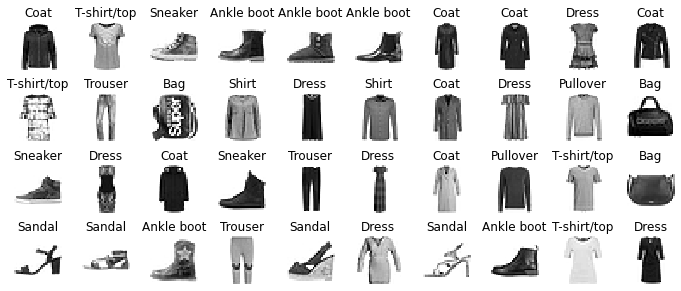

In [265]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

In [26]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [27]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [29]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [30]:
history = model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4846 - accuracy: 0.8254 - val_loss: 0.3661 - val_accuracy: 0.8650
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3633 - accuracy: 0.8666 - val_loss: 0.3897 - val_accuracy: 0.8584
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3289 - accuracy: 0.8779 - val_loss: 0.3290 - val_accuracy: 0.8792
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3035 - accuracy: 0.8878 - val_loss: 0.3138 - val_accuracy: 0.8870
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2858 - accuracy: 0.8932 - val_loss: 0.2978 - val_accuracy: 0.8906
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2699 - accuracy: 0.8997 - val_loss: 0.3321 - val_accuracy: 0.8844
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.2593 - accuracy: 0.9029 - val_loss: 0.2972 - val_accuracy:

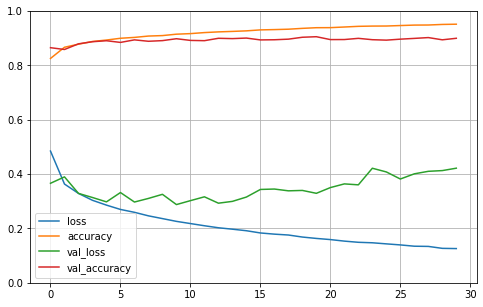

In [31]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [32]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4529 - accuracy: 0.8929


[0.4528706669807434, 0.8928999900817871]

# Hyperparameter tuning

In [ ]:
# excecuted in google colab

In [38]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

input_shape=X_train[0].shape
def build_model(n_hidden = 1, n_neurons = 30, activation_func="relu", input_shape=input_shape):
    grid_model = keras.models.Sequential()
    grid_model.add(keras.layers.Flatten(input_shape=input_shape))
    for layer in range(n_hidden):
        grid_model.add(keras.layers.Dense(n_neurons, activation=activation_func))
    grid_model.add(keras.layers.Dense(10, activation="softmax"))
    opt = tf.keras.optimizers.Adam()
    grid_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return grid_model

In [39]:
param_distribs = {
    "n_hidden": [1, 2, 3, 4, 5],
    "n_neurons": np.arange(1, 300),
    "activation_func": ["relu", "sigmoid", "tanh"]
}

In [40]:
keras_clf = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"], n_neurons=param_distribs["n_neurons"],
                           activation_func=param_distribs["activation_func"], verbose=1)

C:\Users\tille\AppData\Local\Temp\ipykernel_5584\4177884463.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"], n_neurons=param_distribs["n_neurons"],


In [41]:
rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
1146/1146 [==============================] - 4s 3ms/step - loss: 1.8794 - accuracy: 0.4420 - val_loss: 1.2085 - val_accuracy: 0.6430
Epoch 2/30
1146/1146 [==============================] - 3s 3ms/step - loss: 0.9223 - accuracy: 0.7008 - val_loss: 0.7672 - val_accuracy: 0.7434
Epoch 3/30
1146/1146 [==============================] - 3s 3ms/step - loss: 0.7049 - accuracy: 0.7571 - val_loss: 0.6436 - val_accuracy: 0.7804
Epoch 4/30
1146/1146 [==============================] - 3s 3ms/step - loss: 0.6177 - accuracy: 0.7847 - val_loss: 0.5730 - val_accuracy: 0.8056
Epoch 5/30
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5689 - accuracy: 0.7999 - val_loss: 0.5497 - val_accuracy: 0.8136
Epoch 6/30
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5369 - accuracy: 0.8122 - val_loss: 0.5069 - val_accuracy: 0.8306
Epoch 7/30
1146/1146 [==============================] - 3s 3ms/step - loss: 0.5125 - accuracy: 0.8226 - val_loss: 0.4987 - val_accuracy:

KeyboardInterrupt: 

# Refitting the best model

In [271]:
n_neurons = 181
n_hidden = 1
activation_func = "relu"

best_model = keras.models.Sequential()
best_model.add(keras.layers.Flatten(input_shape=[28, 28]))
for layer in range(n_hidden):
    best_model.add(keras.layers.Dense(n_neurons, activation=activation_func))
best_model.add(keras.layers.Dense(10, activation="softmax"))

best_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [272]:
history = best_model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4982 - accuracy: 0.8229 - val_loss: 0.3830 - val_accuracy: 0.8642
Epoch 2/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3710 - accuracy: 0.8658 - val_loss: 0.3998 - val_accuracy: 0.8608
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3367 - accuracy: 0.8762 - val_loss: 0.3312 - val_accuracy: 0.8812
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3087 - accuracy: 0.8865 - val_loss: 0.3106 - val_accuracy: 0.8870
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2918 - accuracy: 0.8912 - val_loss: 0.3154 - val_accuracy: 0.8846
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2770 - accuracy: 0.8973 - val_loss: 0.3228 - val_accuracy: 0.8850
Epoch 7/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.2656 - accuracy: 0.9019 - val_loss: 0.3093 - val_accuracy:

In [273]:
best_model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4169 - accuracy: 0.8904


[0.41685235500335693, 0.8903999924659729]

5- Save the weights of the layers and use callbacks during the training process.

model.save_weights("my_keras_weights.ckpt")

model.load_weights("my_keras_weights.ckpt")

6- Practice saving and loading the trained model.

model.save("my_keras_model.h5")

model = keras.models.load_model("my_keras_model.h5")

# Classifier for IRIS

In [274]:
from sklearn.datasets import load_iris
from tensorflow import keras

iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [275]:
X_train_full.shape

(120, 4)

In [276]:
X_train_full.dtype

dtype('float64')

In [277]:
X_valid, X_train = X_train_full[:20] , X_train_full[20:]
y_valid, y_train = y_train_full[:20], y_train_full[20:]

In [278]:
X_valid.shape

(20, 4)

In [279]:
X_test.shape

(30, 4)

In [76]:
model = keras.models.Sequential()
model.add(keras.layers.Dense(300, activation="relu", input_dim=X_train.shape[1]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(3, activation="softmax"))

In [77]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 300)               1500      
                                                                 
 dense_16 (Dense)            (None, 100)               30100     
                                                                 
 dense_17 (Dense)            (None, 3)                 303       
                                                                 
Total params: 31,903
Trainable params: 31,903
Non-trainable params: 0
_________________________________________________________________


In [78]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [79]:
history = model.fit(X_train, y_train, epochs=200,
                    validation_data=(X_valid, y_valid), callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/200
4/4 [==============================] - 1s 56ms/step - loss: 1.1911 - accuracy: 0.3200 - val_loss: 0.9324 - val_accuracy: 0.7000
Epoch 2/200
4/4 [==============================] - 0s 10ms/step - loss: 0.9293 - accuracy: 0.6800 - val_loss: 0.8145 - val_accuracy: 0.7000
Epoch 3/200
4/4 [==============================] - 0s 10ms/step - loss: 0.7948 - accuracy: 0.6900 - val_loss: 0.7077 - val_accuracy: 0.7000
Epoch 4/200
4/4 [==============================] - 0s 11ms/step - loss: 0.6790 - accuracy: 0.7000 - val_loss: 0.6324 - val_accuracy: 0.7000
Epoch 5/200
4/4 [==============================] - 0s 10ms/step - loss: 0.6353 - accuracy: 0.6900 - val_loss: 0.5901 - val_accuracy: 0.7000
Epoch 6/200
4/4 [==============================] - 0s 11ms/step - loss: 0.5735 - accuracy: 0.7000 - val_loss: 0.5493 - val_accuracy: 0.8500
Epoch 7/200
4/4 [==============================] - 0s 10ms/step - loss: 0.5070 - accuracy: 0.9200 - val_loss: 0.5351 - val_accuracy: 0.9000
Epoch 8/200
4/4 [===

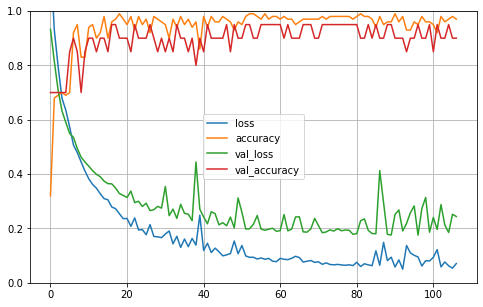

In [80]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [81]:
model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 22ms/step - loss: 0.0523 - accuracy: 1.0000


[0.05226067453622818, 1.0]

# Hyperparameter tuning

In [95]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasClassifier

def build_model(n_hidden = 1, n_neurons = 30, activation_func="relu", input_shape=input_shape):
    grid_model = keras.models.Sequential()
    grid_model.add(keras.layers.Dense(n_neurons, activation=activation_func, input_dim=4))
    for layer in range(n_hidden-1):
        grid_model.add(keras.layers.Dense(n_neurons, activation=activation_func))
    grid_model.add(keras.layers.Dense(3, activation="softmax"))
    opt = tf.keras.optimizers.Adam()
    grid_model.compile(loss="sparse_categorical_crossentropy", optimizer=opt, metrics=["accuracy"])
    return grid_model

In [96]:
param_distribs = {
    "n_hidden": [1, 2, 3],
    "n_neurons": np.arange(1, 300),
    "activation_func": ["relu", "sigmoid", "tanh"]
}

In [97]:
keras_clf = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"], n_neurons=param_distribs["n_neurons"],
                           activation_func=param_distribs["activation_func"], verbose=1)

C:\Users\tille\AppData\Local\Temp\ipykernel_5584\2724731690.py:1: DeprecationWarning: KerasClassifier is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasClassifier(build_model, n_hidden=param_distribs["n_hidden"], n_neurons=param_distribs["n_neurons"],


In [98]:
rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=30, cv=3)

rnd_search_cv.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid), 
                  callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/30
3/3 [==============================] - 1s 85ms/step - loss: 1.1724 - accuracy: 0.2727 - val_loss: 0.9227 - val_accuracy: 0.7000
Epoch 2/30
3/3 [==============================] - 0s 17ms/step - loss: 0.8290 - accuracy: 0.7424 - val_loss: 0.8114 - val_accuracy: 0.5500
Epoch 3/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7407 - accuracy: 0.6515 - val_loss: 0.8617 - val_accuracy: 0.5500
Epoch 4/30
3/3 [==============================] - 0s 15ms/step - loss: 0.7351 - accuracy: 0.6515 - val_loss: 0.7128 - val_accuracy: 0.5500
Epoch 5/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5712 - accuracy: 0.6818 - val_loss: 0.6145 - val_accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5215 - accuracy: 0.7424 - val_loss: 0.6333 - val_accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5222 - accuracy: 0.7424 - val_loss: 0.5298 - val_accuracy: 0.7000
Epoch 8/30
3/3 [===========

3/3 [==============================] - 0s 12ms/step - loss: 0.1910 - accuracy: 0.9552 - val_loss: 0.3060 - val_accuracy: 0.9000
Epoch 30/30
2/2 [==============================] - 0s 2ms/step - loss: 0.0910 - accuracy: 1.0000
Epoch 1/30
3/3 [==============================] - 1s 95ms/step - loss: 1.1069 - accuracy: 0.3881 - val_loss: 1.1048 - val_accuracy: 0.7000
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 1.0867 - accuracy: 0.7164 - val_loss: 0.9503 - val_accuracy: 0.7000
Epoch 3/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7895 - accuracy: 0.7164 - val_loss: 0.7070 - val_accuracy: 0.8500
Epoch 4/30
3/3 [==============================] - 0s 11ms/step - loss: 0.7045 - accuracy: 0.7463 - val_loss: 0.7170 - val_accuracy: 0.5000
Epoch 5/30
3/3 [==============================] - 0s 13ms/step - loss: 0.6789 - accuracy: 0.6716 - val_loss: 0.6144 - val_accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 0.5920 - 

3/3 [==============================] - 0s 12ms/step - loss: 0.4859 - accuracy: 0.9403 - val_loss: 0.5261 - val_accuracy: 0.9000
Epoch 24/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4768 - accuracy: 0.9104 - val_loss: 0.5118 - val_accuracy: 0.8000
Epoch 25/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4637 - accuracy: 0.8657 - val_loss: 0.5001 - val_accuracy: 0.8000
Epoch 26/30
3/3 [==============================] - 0s 11ms/step - loss: 0.4572 - accuracy: 0.7910 - val_loss: 0.4926 - val_accuracy: 0.7500
Epoch 27/30
3/3 [==============================] - 0s 11ms/step - loss: 0.4516 - accuracy: 0.7612 - val_loss: 0.4860 - val_accuracy: 0.8000
Epoch 28/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4378 - accuracy: 0.7910 - val_loss: 0.4807 - val_accuracy: 0.7500
Epoch 29/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4367 - accuracy: 0.7463 - val_loss: 0.4841 - val_accuracy: 0.7000
Epoch 30/30
2/2 [===============

3/3 [==============================] - 0s 12ms/step - loss: 0.8812 - accuracy: 0.7424 - val_loss: 0.9127 - val_accuracy: 0.7000
Epoch 18/30
3/3 [==============================] - 0s 11ms/step - loss: 0.8737 - accuracy: 0.7424 - val_loss: 0.9000 - val_accuracy: 0.7000
Epoch 19/30
3/3 [==============================] - 0s 12ms/step - loss: 0.8669 - accuracy: 0.7424 - val_loss: 0.8888 - val_accuracy: 0.7000
Epoch 20/30
3/3 [==============================] - 0s 12ms/step - loss: 0.8661 - accuracy: 0.7424 - val_loss: 0.8803 - val_accuracy: 0.7000
Epoch 21/30
3/3 [==============================] - 0s 11ms/step - loss: 0.8597 - accuracy: 0.7424 - val_loss: 0.8733 - val_accuracy: 0.7000
Epoch 22/30
3/3 [==============================] - 0s 12ms/step - loss: 0.8500 - accuracy: 0.7424 - val_loss: 0.8676 - val_accuracy: 0.7000
Epoch 23/30
3/3 [==============================] - 0s 11ms/step - loss: 0.8396 - accuracy: 0.7424 - val_loss: 0.8596 - val_accuracy: 0.7000
Epoch 24/30
3/3 [===============

3/3 [==============================] - 0s 12ms/step - loss: 0.4664 - accuracy: 0.8955 - val_loss: 0.4641 - val_accuracy: 0.8000
Epoch 12/30
3/3 [==============================] - 0s 13ms/step - loss: 0.4608 - accuracy: 0.8358 - val_loss: 0.4509 - val_accuracy: 0.9000
Epoch 13/30
3/3 [==============================] - 0s 13ms/step - loss: 0.4367 - accuracy: 0.9254 - val_loss: 0.4412 - val_accuracy: 0.9000
Epoch 14/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4125 - accuracy: 0.9552 - val_loss: 0.4398 - val_accuracy: 0.9500
Epoch 15/30
3/3 [==============================] - 0s 11ms/step - loss: 0.4043 - accuracy: 0.9701 - val_loss: 0.4314 - val_accuracy: 0.9500
Epoch 16/30
3/3 [==============================] - 0s 14ms/step - loss: 0.3815 - accuracy: 0.9701 - val_loss: 0.4056 - val_accuracy: 0.9000
Epoch 17/30
3/3 [==============================] - 0s 13ms/step - loss: 0.3725 - accuracy: 0.9701 - val_loss: 0.3967 - val_accuracy: 0.9000
Epoch 18/30
3/3 [===============

Epoch 16/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5425 - accuracy: 0.7424 - val_loss: 0.6024 - val_accuracy: 0.7000
Epoch 17/30
3/3 [==============================] - 0s 11ms/step - loss: 0.5261 - accuracy: 0.7424 - val_loss: 0.5885 - val_accuracy: 0.7000
Epoch 18/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5152 - accuracy: 0.7424 - val_loss: 0.5777 - val_accuracy: 0.7000
Epoch 19/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5052 - accuracy: 0.7424 - val_loss: 0.5661 - val_accuracy: 0.7000
Epoch 20/30
3/3 [==============================] - 0s 11ms/step - loss: 0.4982 - accuracy: 0.7424 - val_loss: 0.5549 - val_accuracy: 0.7000
Epoch 21/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4849 - accuracy: 0.7424 - val_loss: 0.5390 - val_accuracy: 0.7000
Epoch 22/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4683 - accuracy: 0.7424 - val_loss: 0.5283 - val_accuracy: 0.7000
Epoch 23/30
3/3 [===

3/3 [==============================] - 0s 12ms/step - loss: 0.4285 - accuracy: 0.8060 - val_loss: 0.4919 - val_accuracy: 0.7000
Epoch 11/30
3/3 [==============================] - 0s 13ms/step - loss: 0.3619 - accuracy: 0.8209 - val_loss: 0.3559 - val_accuracy: 0.9500
Epoch 12/30
3/3 [==============================] - 0s 14ms/step - loss: 0.3064 - accuracy: 0.9552 - val_loss: 0.3479 - val_accuracy: 0.9000
Epoch 13/30
3/3 [==============================] - 0s 13ms/step - loss: 0.3238 - accuracy: 0.8657 - val_loss: 0.3260 - val_accuracy: 0.9000
Epoch 14/30
3/3 [==============================] - 0s 12ms/step - loss: 0.2757 - accuracy: 0.9403 - val_loss: 0.3316 - val_accuracy: 0.9000
Epoch 15/30
3/3 [==============================] - 0s 12ms/step - loss: 0.2792 - accuracy: 0.9552 - val_loss: 0.3244 - val_accuracy: 0.9000
Epoch 16/30
3/3 [==============================] - 0s 13ms/step - loss: 0.2409 - accuracy: 0.9701 - val_loss: 0.2918 - val_accuracy: 0.9000
Epoch 17/30
3/3 [===============

3/3 [==============================] - 0s 12ms/step - loss: 0.8686 - accuracy: 0.6269 - val_loss: 0.8504 - val_accuracy: 0.5500
Epoch 5/30
3/3 [==============================] - 0s 12ms/step - loss: 0.8299 - accuracy: 0.6269 - val_loss: 0.7803 - val_accuracy: 0.9000
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 0.7693 - accuracy: 0.8060 - val_loss: 0.7247 - val_accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 0s 11ms/step - loss: 0.7111 - accuracy: 0.7164 - val_loss: 0.6936 - val_accuracy: 0.7000
Epoch 8/30
3/3 [==============================] - 0s 11ms/step - loss: 0.6767 - accuracy: 0.7164 - val_loss: 0.6682 - val_accuracy: 0.7000
Epoch 9/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6526 - accuracy: 0.7164 - val_loss: 0.6474 - val_accuracy: 0.7000
Epoch 10/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6281 - accuracy: 0.7164 - val_loss: 0.6308 - val_accuracy: 0.7000
Epoch 11/30
3/3 [====================

3/3 [==============================] - 0s 15ms/step - loss: 1.0459 - accuracy: 0.7164 - val_loss: 1.0442 - val_accuracy: 0.7000
Epoch 30/30
2/2 [==============================] - 0s 2ms/step - loss: 1.0730 - accuracy: 0.6364
Epoch 1/30
3/3 [==============================] - 1s 102ms/step - loss: 1.3654 - accuracy: 0.0606 - val_loss: 1.1484 - val_accuracy: 0.2000
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 1.2488 - accuracy: 0.1818 - val_loss: 1.1249 - val_accuracy: 0.3000
Epoch 3/30
3/3 [==============================] - 0s 13ms/step - loss: 1.1667 - accuracy: 0.2576 - val_loss: 1.1196 - val_accuracy: 0.3000
Epoch 4/30
3/3 [==============================] - 0s 13ms/step - loss: 1.1058 - accuracy: 0.3939 - val_loss: 1.1233 - val_accuracy: 0.5500
Epoch 5/30
3/3 [==============================] - 0s 13ms/step - loss: 1.0661 - accuracy: 0.6515 - val_loss: 1.1218 - val_accuracy: 0.3500
Epoch 6/30
3/3 [==============================] - 0s 14ms/step - loss: 1.0333 -

3/3 [==============================] - 0s 12ms/step - loss: 0.8117 - accuracy: 0.7424 - val_loss: 0.8338 - val_accuracy: 0.7000
Epoch 24/30
3/3 [==============================] - 0s 13ms/step - loss: 0.7973 - accuracy: 0.7424 - val_loss: 0.8257 - val_accuracy: 0.7000
Epoch 25/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7868 - accuracy: 0.7424 - val_loss: 0.8207 - val_accuracy: 0.7000
Epoch 26/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7738 - accuracy: 0.7424 - val_loss: 0.8214 - val_accuracy: 0.7000
Epoch 27/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7610 - accuracy: 0.7424 - val_loss: 0.8327 - val_accuracy: 0.7000
Epoch 28/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7562 - accuracy: 0.7424 - val_loss: 0.8435 - val_accuracy: 0.7000
Epoch 29/30
3/3 [==============================] - 0s 13ms/step - loss: 0.7617 - accuracy: 0.7424 - val_loss: 0.8406 - val_accuracy: 0.7000
Epoch 30/30
2/2 [===============

3/3 [==============================] - 0s 16ms/step - loss: 1.0572 - accuracy: 0.3881 - val_loss: 1.0601 - val_accuracy: 0.5500
Epoch 18/30
3/3 [==============================] - 0s 15ms/step - loss: 1.0536 - accuracy: 0.6716 - val_loss: 1.0546 - val_accuracy: 0.8500
Epoch 19/30
3/3 [==============================] - 0s 15ms/step - loss: 1.0561 - accuracy: 0.6418 - val_loss: 1.0569 - val_accuracy: 0.6500
Epoch 20/30
3/3 [==============================] - 0s 15ms/step - loss: 1.0585 - accuracy: 0.4627 - val_loss: 1.0650 - val_accuracy: 0.2500
Epoch 21/30
2/2 [==============================] - 0s 2ms/step - loss: 1.0150 - accuracy: 0.4545
Epoch 1/30
3/3 [==============================] - 1s 88ms/step - loss: 1.1782 - accuracy: 0.2985 - val_loss: 1.0706 - val_accuracy: 0.4500
Epoch 2/30
3/3 [==============================] - 0s 12ms/step - loss: 1.1026 - accuracy: 0.3731 - val_loss: 1.1312 - val_accuracy: 0.2500
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0987

3/3 [==============================] - 0s 15ms/step - loss: 0.9895 - accuracy: 0.6418 - val_loss: 0.9765 - val_accuracy: 0.6000
Epoch 21/30
3/3 [==============================] - 0s 13ms/step - loss: 0.9841 - accuracy: 0.6716 - val_loss: 0.9729 - val_accuracy: 0.6500
Epoch 22/30
3/3 [==============================] - 0s 14ms/step - loss: 0.9788 - accuracy: 0.7015 - val_loss: 0.9697 - val_accuracy: 0.7000
Epoch 23/30
3/3 [==============================] - 0s 15ms/step - loss: 0.9736 - accuracy: 0.7164 - val_loss: 0.9662 - val_accuracy: 0.7000
Epoch 24/30
3/3 [==============================] - 0s 14ms/step - loss: 0.9683 - accuracy: 0.7164 - val_loss: 0.9620 - val_accuracy: 0.7000
Epoch 25/30
3/3 [==============================] - 0s 13ms/step - loss: 0.9633 - accuracy: 0.7164 - val_loss: 0.9579 - val_accuracy: 0.7000
Epoch 26/30
3/3 [==============================] - 0s 13ms/step - loss: 0.9586 - accuracy: 0.7164 - val_loss: 0.9541 - val_accuracy: 0.7000
Epoch 27/30
3/3 [===============

3/3 [==============================] - 0s 14ms/step - loss: 0.6144 - accuracy: 0.7424 - val_loss: 0.6468 - val_accuracy: 0.7000
Epoch 15/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5937 - accuracy: 0.7424 - val_loss: 0.6338 - val_accuracy: 0.7000
Epoch 16/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5750 - accuracy: 0.7424 - val_loss: 0.6200 - val_accuracy: 0.7000
Epoch 17/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5580 - accuracy: 0.7424 - val_loss: 0.6085 - val_accuracy: 0.7000
Epoch 18/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5502 - accuracy: 0.7424 - val_loss: 0.6023 - val_accuracy: 0.7000
Epoch 19/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5435 - accuracy: 0.7424 - val_loss: 0.5945 - val_accuracy: 0.7000
Epoch 20/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5379 - accuracy: 0.7424 - val_loss: 0.5854 - val_accuracy: 0.7000
Epoch 21/30
3/3 [===============

3/3 [==============================] - 0s 13ms/step - loss: 0.5810 - accuracy: 0.8358 - val_loss: 0.5559 - val_accuracy: 0.8500
Epoch 9/30
3/3 [==============================] - 0s 12ms/step - loss: 0.5503 - accuracy: 0.8209 - val_loss: 0.5259 - val_accuracy: 0.7500
Epoch 10/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5301 - accuracy: 0.8060 - val_loss: 0.5171 - val_accuracy: 0.8500
Epoch 11/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5032 - accuracy: 0.8507 - val_loss: 0.4982 - val_accuracy: 0.7500
Epoch 12/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4925 - accuracy: 0.7761 - val_loss: 0.4860 - val_accuracy: 0.8500
Epoch 13/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4744 - accuracy: 0.8358 - val_loss: 0.4756 - val_accuracy: 0.8500
Epoch 14/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4556 - accuracy: 0.9254 - val_loss: 0.4700 - val_accuracy: 0.9000
Epoch 15/30
3/3 [================

3/3 [==============================] - 0s 12ms/step - loss: 1.6061 - accuracy: 0.2836 - val_loss: 1.5118 - val_accuracy: 0.3000
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 1.4283 - accuracy: 0.2836 - val_loss: 1.3508 - val_accuracy: 0.3000
Epoch 4/30
3/3 [==============================] - 0s 12ms/step - loss: 1.2756 - accuracy: 0.2836 - val_loss: 1.2108 - val_accuracy: 0.3000
Epoch 5/30
3/3 [==============================] - 0s 12ms/step - loss: 1.1667 - accuracy: 0.2836 - val_loss: 1.1025 - val_accuracy: 0.3000
Epoch 6/30
3/3 [==============================] - 0s 11ms/step - loss: 1.0945 - accuracy: 0.2836 - val_loss: 1.0394 - val_accuracy: 0.2500
Epoch 7/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0446 - accuracy: 0.3881 - val_loss: 1.0049 - val_accuracy: 0.4500
Epoch 8/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0237 - accuracy: 0.3731 - val_loss: 0.9783 - val_accuracy: 0.4500
Epoch 9/30
3/3 [======================

3/3 [==============================] - 0s 14ms/step - loss: 0.4741 - accuracy: 0.7612 - val_loss: 0.4995 - val_accuracy: 0.7000
Epoch 28/30
3/3 [==============================] - 0s 13ms/step - loss: 0.4627 - accuracy: 0.7761 - val_loss: 0.4930 - val_accuracy: 0.7000
Epoch 29/30
3/3 [==============================] - 0s 13ms/step - loss: 0.4594 - accuracy: 0.7612 - val_loss: 0.4922 - val_accuracy: 0.7000
Epoch 30/30
2/2 [==============================] - 0s 2ms/step - loss: 0.5312 - accuracy: 0.6364
Epoch 1/30
3/3 [==============================] - 1s 97ms/step - loss: 1.0970 - accuracy: 0.1667 - val_loss: 1.0364 - val_accuracy: 0.6500
Epoch 2/30
3/3 [==============================] - 0s 13ms/step - loss: 0.9793 - accuracy: 0.6970 - val_loss: 0.9845 - val_accuracy: 0.5000
Epoch 3/30
3/3 [==============================] - 0s 15ms/step - loss: 0.9144 - accuracy: 0.6061 - val_loss: 0.9506 - val_accuracy: 0.5500
Epoch 4/30
3/3 [==============================] - 0s 13ms/step - loss: 0.8673 

3/3 [==============================] - 0s 13ms/step - loss: 0.5827 - accuracy: 0.7424 - val_loss: 0.6328 - val_accuracy: 0.7000
Epoch 22/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5669 - accuracy: 0.7424 - val_loss: 0.6204 - val_accuracy: 0.7000
Epoch 23/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5513 - accuracy: 0.7424 - val_loss: 0.6060 - val_accuracy: 0.7000
Epoch 24/30
3/3 [==============================] - 0s 15ms/step - loss: 0.5335 - accuracy: 0.7424 - val_loss: 0.5946 - val_accuracy: 0.7000
Epoch 25/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5211 - accuracy: 0.7576 - val_loss: 0.5859 - val_accuracy: 0.7000
Epoch 26/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5096 - accuracy: 0.7576 - val_loss: 0.5789 - val_accuracy: 0.7000
Epoch 27/30
3/3 [==============================] - 0s 14ms/step - loss: 0.4982 - accuracy: 0.7576 - val_loss: 0.5746 - val_accuracy: 0.7000
Epoch 28/30
3/3 [===============

3/3 [==============================] - 0s 13ms/step - loss: 0.4837 - accuracy: 0.9552 - val_loss: 0.4908 - val_accuracy: 0.9000
Epoch 16/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4621 - accuracy: 0.9701 - val_loss: 0.4707 - val_accuracy: 0.9000
Epoch 17/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4512 - accuracy: 0.9403 - val_loss: 0.4633 - val_accuracy: 0.9000
Epoch 18/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4354 - accuracy: 0.9552 - val_loss: 0.4507 - val_accuracy: 0.9000
Epoch 19/30
3/3 [==============================] - 0s 13ms/step - loss: 0.4252 - accuracy: 0.9552 - val_loss: 0.4402 - val_accuracy: 0.9000
Epoch 20/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4134 - accuracy: 0.9552 - val_loss: 0.4426 - val_accuracy: 0.9500
Epoch 21/30
3/3 [==============================] - 0s 14ms/step - loss: 0.3967 - accuracy: 0.9851 - val_loss: 0.4378 - val_accuracy: 0.8500
Epoch 22/30
3/3 [===============

3/3 [==============================] - 0s 13ms/step - loss: 1.0620 - accuracy: 0.3731 - val_loss: 1.0366 - val_accuracy: 0.4500
Epoch 10/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0598 - accuracy: 0.3731 - val_loss: 1.0321 - val_accuracy: 0.4500
Epoch 11/30
3/3 [==============================] - 0s 11ms/step - loss: 1.0587 - accuracy: 0.3731 - val_loss: 1.0295 - val_accuracy: 0.4500
Epoch 12/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0527 - accuracy: 0.3731 - val_loss: 1.0284 - val_accuracy: 0.4500
Epoch 13/30
3/3 [==============================] - 0s 13ms/step - loss: 1.0446 - accuracy: 0.3731 - val_loss: 1.0266 - val_accuracy: 0.4500
Epoch 14/30
3/3 [==============================] - 0s 12ms/step - loss: 1.0373 - accuracy: 0.3731 - val_loss: 1.0237 - val_accuracy: 0.4500
Epoch 15/30
3/3 [==============================] - 0s 13ms/step - loss: 1.0308 - accuracy: 0.3731 - val_loss: 1.0189 - val_accuracy: 0.5000
Epoch 16/30
3/3 [===============

3/3 [==============================] - 0s 13ms/step - loss: 0.8416 - accuracy: 0.6515 - val_loss: 0.8435 - val_accuracy: 0.5500
Epoch 4/30
3/3 [==============================] - 0s 13ms/step - loss: 0.7124 - accuracy: 0.6818 - val_loss: 0.7385 - val_accuracy: 0.7000
Epoch 5/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6153 - accuracy: 0.8636 - val_loss: 0.6753 - val_accuracy: 0.7000
Epoch 6/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5652 - accuracy: 0.7424 - val_loss: 0.6302 - val_accuracy: 0.7000
Epoch 7/30
3/3 [==============================] - 0s 13ms/step - loss: 0.5249 - accuracy: 0.7424 - val_loss: 0.5598 - val_accuracy: 0.7000
Epoch 8/30
3/3 [==============================] - 0s 12ms/step - loss: 0.4530 - accuracy: 0.7576 - val_loss: 0.5279 - val_accuracy: 0.8000
Epoch 9/30
3/3 [==============================] - 0s 13ms/step - loss: 0.4189 - accuracy: 0.9697 - val_loss: 0.5293 - val_accuracy: 0.7500
Epoch 10/30
3/3 [=====================

3/3 [==============================] - 0s 13ms/step - loss: 0.1138 - accuracy: 0.9697 - val_loss: 0.2380 - val_accuracy: 0.9000
Epoch 29/30
3/3 [==============================] - 0s 14ms/step - loss: 0.1127 - accuracy: 0.9697 - val_loss: 0.2323 - val_accuracy: 0.9000
Epoch 30/30
2/2 [==============================] - 0s 3ms/step - loss: 0.1887 - accuracy: 0.9412
Epoch 1/30
3/3 [==============================] - 1s 91ms/step - loss: 1.1374 - accuracy: 0.3582 - val_loss: 0.8019 - val_accuracy: 0.7000
Epoch 2/30
3/3 [==============================] - 0s 12ms/step - loss: 0.8370 - accuracy: 0.6119 - val_loss: 0.7438 - val_accuracy: 0.5500
Epoch 3/30
3/3 [==============================] - 0s 12ms/step - loss: 0.6924 - accuracy: 0.6716 - val_loss: 1.0303 - val_accuracy: 0.5000
Epoch 4/30
3/3 [==============================] - 0s 13ms/step - loss: 0.7950 - accuracy: 0.6418 - val_loss: 0.5816 - val_accuracy: 0.9000
Epoch 5/30
3/3 [==============================] - 0s 14ms/step - loss: 0.5414 -

3/3 [==============================] - 0s 18ms/step - loss: 0.8799 - accuracy: 0.8507 - val_loss: 0.8833 - val_accuracy: 0.7500
Epoch 23/30
3/3 [==============================] - 0s 15ms/step - loss: 0.8656 - accuracy: 0.8060 - val_loss: 0.8592 - val_accuracy: 0.9000
Epoch 24/30
3/3 [==============================] - 0s 14ms/step - loss: 0.8572 - accuracy: 0.7910 - val_loss: 0.8291 - val_accuracy: 0.8000
Epoch 25/30
3/3 [==============================] - 0s 13ms/step - loss: 0.8520 - accuracy: 0.7015 - val_loss: 0.8074 - val_accuracy: 0.7000
Epoch 26/30
3/3 [==============================] - 0s 13ms/step - loss: 0.8508 - accuracy: 0.6269 - val_loss: 0.7906 - val_accuracy: 0.7000
Epoch 27/30
3/3 [==============================] - 0s 15ms/step - loss: 0.8338 - accuracy: 0.6269 - val_loss: 0.7896 - val_accuracy: 0.8500
Epoch 28/30
3/3 [==============================] - 0s 14ms/step - loss: 0.7989 - accuracy: 0.8358 - val_loss: 0.7841 - val_accuracy: 0.9000
Epoch 29/30
3/3 [===============

3/3 [==============================] - 0s 17ms/step - loss: 0.2020 - accuracy: 0.9701 - val_loss: 0.2858 - val_accuracy: 0.9000
Epoch 17/30
3/3 [==============================] - 0s 21ms/step - loss: 0.1936 - accuracy: 0.9701 - val_loss: 0.2861 - val_accuracy: 0.9500
Epoch 18/30
3/3 [==============================] - 0s 18ms/step - loss: 0.1779 - accuracy: 1.0000 - val_loss: 0.2900 - val_accuracy: 0.9000
Epoch 19/30
3/3 [==============================] - 0s 18ms/step - loss: 0.1860 - accuracy: 0.9403 - val_loss: 0.3431 - val_accuracy: 0.8500
Epoch 20/30
3/3 [==============================] - 0s 16ms/step - loss: 0.1925 - accuracy: 0.8955 - val_loss: 0.2581 - val_accuracy: 0.9000
Epoch 21/30
3/3 [==============================] - 0s 18ms/step - loss: 0.1472 - accuracy: 1.0000 - val_loss: 0.2904 - val_accuracy: 0.8500
Epoch 22/30
3/3 [==============================] - 0s 22ms/step - loss: 0.1899 - accuracy: 0.9403 - val_loss: 0.2492 - val_accuracy: 0.9500
Epoch 23/30
3/3 [===============

3/3 [==============================] - 0s 13ms/step - loss: 0.9065 - accuracy: 0.6515 - val_loss: 0.9897 - val_accuracy: 0.5500
Epoch 11/30
3/3 [==============================] - 0s 15ms/step - loss: 0.9316 - accuracy: 0.6515 - val_loss: 0.9226 - val_accuracy: 0.5500
Epoch 12/30
3/3 [==============================] - 0s 14ms/step - loss: 0.8356 - accuracy: 0.7273 - val_loss: 0.8662 - val_accuracy: 0.7000
Epoch 13/30
3/3 [==============================] - 0s 13ms/step - loss: 0.8158 - accuracy: 0.7424 - val_loss: 0.8998 - val_accuracy: 0.7000
Epoch 14/30
3/3 [==============================] - 0s 14ms/step - loss: 0.8215 - accuracy: 0.7424 - val_loss: 0.9327 - val_accuracy: 0.7000
Epoch 15/30
3/3 [==============================] - 0s 13ms/step - loss: 0.8043 - accuracy: 0.7424 - val_loss: 0.8355 - val_accuracy: 0.7000
Epoch 16/30
3/3 [==============================] - 0s 13ms/step - loss: 0.7357 - accuracy: 0.7424 - val_loss: 0.7809 - val_accuracy: 0.7000
Epoch 17/30
3/3 [===============

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasClassifier object at 0x0000026CC69830A0>,
                   n_iter=30,
                   param_distributions={'activation_func': ['relu', 'sigmoid',
                                                            'tanh'],
                                        'n_hidden': [1, 2, 3],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47...
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 2

In [99]:
rnd_search_cv.best_score_

0.9601901372273763

In [100]:
# Print the best hyperparameters
print("Best Hyperparameters:", rnd_search_cv.best_params_)

Best Hyperparameters: {'n_neurons': 227, 'n_hidden': 2, 'activation_func': 'tanh'}


# Refitting the best model

In [283]:
n_neurons = 227
n_hidden = 2
activation_func = "tanh"

best_model = keras.models.Sequential()
best_model.add(keras.layers.Dense(n_neurons, activation=activation_func, input_dim=4))
for layer in range(n_hidden-1):
    best_model.add(keras.layers.Dense(n_neurons, activation=activation_func))
best_model.add(keras.layers.Dense(3, activation="softmax"))

best_model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [284]:
history = best_model.fit(X_train, y_train, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
4/4 [==============================] - 1s 59ms/step - loss: 1.3415 - accuracy: 0.3300 - val_loss: 0.7979 - val_accuracy: 0.7000
Epoch 2/30
4/4 [==============================] - 0s 9ms/step - loss: 0.7306 - accuracy: 0.6700 - val_loss: 0.7581 - val_accuracy: 0.5500
Epoch 3/30
4/4 [==============================] - 0s 15ms/step - loss: 0.6373 - accuracy: 0.6300 - val_loss: 0.5381 - val_accuracy: 0.7000
Epoch 4/30
4/4 [==============================] - 0s 12ms/step - loss: 0.4871 - accuracy: 0.6900 - val_loss: 0.4979 - val_accuracy: 0.7000
Epoch 5/30
4/4 [==============================] - 0s 13ms/step - loss: 0.4814 - accuracy: 0.6900 - val_loss: 0.4504 - val_accuracy: 0.8500
Epoch 6/30
4/4 [==============================] - 0s 12ms/step - loss: 0.4568 - accuracy: 0.7600 - val_loss: 0.5084 - val_accuracy: 0.6500
Epoch 7/30
4/4 [==============================] - 0s 12ms/step - loss: 0.3655 - accuracy: 0.9000 - val_loss: 0.3912 - val_accuracy: 0.8000
Epoch 8/30
4/4 [============

In [285]:
best_model.evaluate(X_test, y_test)

1/1 [==============================] - 0s 19ms/step - loss: 0.2479 - accuracy: 0.8333


[0.2479390949010849, 0.8333333134651184]

5- Save the weights of the layers and use callbacks during the training process.

model.save_weights("my_keras_weights.ckpt")

model.load_weights("my_keras_weights.ckpt")

6- Practice saving and loading the trained model.

model.save("my_keras_model.h5")


model = keras.models.load_model("my_keras_model.h5")

# Regression task

## Regression problem

In [286]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
import pandas as pd

data = fetch_california_housing()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target
X = df.drop('target', axis=1)
y = df['target']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [287]:
x_train.shape

(16512, 8)

In [288]:
# use 1/6 of training for validation
print(16512/6)

2752.0


In [289]:
x_valid, x_train = x_train[:2752] , x_train[2752:]
y_valid, y_train = y_train[:2752], y_train[2752:]

In [290]:
x_valid.shape

(2752, 8)

In [208]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_170"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_418 (Dense)           (None, 32)                288       
                                                                 
 dense_419 (Dense)           (None, 32)                1056      
                                                                 
 dense_420 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [209]:
from tensorflow.keras.callbacks import EarlyStopping

esCallback = EarlyStopping(monitor='val_loss',
                           min_delta=0.05,
                           patience=10,
                           verbose=1,
                           mode='auto')

In [210]:
model.compile(optimizer='adam', loss='mean_squared_error')

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.001)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid),
                   callbacks=[esCallback])

Epoch 1/100
430/430 [==============================] - 1s 1ms/step - loss: 27.3441 - val_loss: 2.1158
Epoch 2/100
430/430 [==============================] - 0s 1ms/step - loss: 5.4369 - val_loss: 1.4055
Epoch 3/100
430/430 [==============================] - 0s 1ms/step - loss: 3.7113 - val_loss: 1.5465
Epoch 4/100
430/430 [==============================] - 0s 984us/step - loss: 1.7643 - val_loss: 11.5554
Epoch 5/100
430/430 [==============================] - 0s 1ms/step - loss: 9.8804 - val_loss: 0.9157
Epoch 6/100
430/430 [==============================] - 0s 963us/step - loss: 1.9817 - val_loss: 11.2401
Epoch 7/100
430/430 [==============================] - 0s 946us/step - loss: 2.8726 - val_loss: 1.3425
Epoch 8/100
430/430 [==============================] - 0s 1ms/step - loss: 17.0465 - val_loss: 26.9498
Epoch 9/100
430/430 [==============================] - 0s 1ms/step - loss: 4.4802 - val_loss: 0.6912
Epoch 10/100
430/430 [==============================] - 0s 1ms/step - loss: 1.04

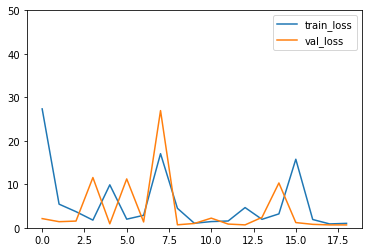

In [211]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.legend()
plt.show()

In [212]:
model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 773us/step - loss: 0.6801


0.6801329255104065

# Change the learing rate

In [213]:
import tensorflow as tf
from tensorflow import keras

model = keras.Sequential([
    keras.layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(32, activation='relu'),
    keras.layers.Dense(1)
])

model.summary()

Model: "sequential_171"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_421 (Dense)           (None, 32)                288       
                                                                 
 dense_422 (Dense)           (None, 32)                1056      
                                                                 
 dense_423 (Dense)           (None, 1)                 33        
                                                                 
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [214]:
from tensorflow.keras.callbacks import EarlyStopping

esCallback = EarlyStopping(monitor='val_loss',
                           min_delta=0.05,
                           patience=10,
                           verbose=1,
                           mode='auto')

In [215]:
model.compile(optimizer='adam', loss='mean_squared_error')

from keras import backend as K
K.set_value(model.optimizer.learning_rate, 0.0001)

history = model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid),
                   callbacks=[esCallback])

Epoch 1/100
430/430 [==============================] - 1s 1ms/step - loss: 31134.1855 - val_loss: 237.8818
Epoch 2/100
430/430 [==============================] - 0s 1ms/step - loss: 75.5973 - val_loss: 28.0566
Epoch 3/100
430/430 [==============================] - 0s 1ms/step - loss: 25.6171 - val_loss: 19.8265
Epoch 4/100
430/430 [==============================] - 0s 963us/step - loss: 17.7417 - val_loss: 13.0398
Epoch 5/100
430/430 [==============================] - 0s 1ms/step - loss: 10.7400 - val_loss: 7.4854
Epoch 6/100
430/430 [==============================] - 0s 998us/step - loss: 5.8567 - val_loss: 3.6887
Epoch 7/100
430/430 [==============================] - 0s 946us/step - loss: 2.9334 - val_loss: 2.0562
Epoch 8/100
430/430 [==============================] - 0s 974us/step - loss: 1.6841 - val_loss: 1.2322
Epoch 9/100
430/430 [==============================] - 0s 974us/step - loss: 1.2274 - val_loss: 0.9358
Epoch 10/100
430/430 [==============================] - 0s 993us/ste

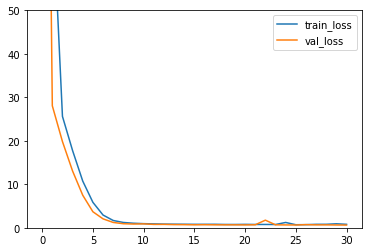

In [216]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='train_loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.ylim([0, 50])
plt.legend()
plt.show()

In [217]:
model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 703us/step - loss: 0.6062


0.606239914894104

# Hyperparameter tuning

In [238]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV
from keras.wrappers.scikit_learn import KerasRegressor

def build_model(n_hidden = 1, n_neurons = 30, activation_func="relu", input_shape=(x_train.shape[1],)):
    grid_model = keras.models.Sequential()
    grid_model.add(keras.layers.Dense(n_neurons, activation=activation_func, input_shape=input_shape))
    for layer in range(n_hidden-1):
        grid_model.add(keras.layers.Dense(n_neurons, activation=activation_func))
    grid_model.add(keras.layers.Dense(1))
    opt = tf.keras.optimizers.Adam()
    grid_model.compile(loss="mean_squared_error", optimizer=opt)
    return grid_model

In [239]:
param_distribs = {
    "n_hidden": [1, 2, 3, 4],
    "n_neurons": np.arange(1, 300),
    "activation_func": ["relu", "sigmoid", "tanh"]
}

In [240]:
keras_clf = KerasRegressor(build_model, n_hidden=param_distribs["n_hidden"], n_neurons=param_distribs["n_neurons"],
                           activation_func=param_distribs["activation_func"], verbose=1)

C:\Users\tille\AppData\Local\Temp\ipykernel_5584\59962815.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_clf = KerasRegressor(build_model, n_hidden=param_distribs["n_hidden"], n_neurons=param_distribs["n_neurons"],


In [241]:
rnd_search_cv = RandomizedSearchCV(keras_clf, param_distribs, n_iter=10, cv=3)

rnd_search_cv.fit(x_train, y_train, epochs=30, validation_data=(x_valid, y_valid), 
                  callbacks=[esCallback])

Epoch 1/30
287/287 [==============================] - 1s 2ms/step - loss: 1.3568 - val_loss: 1.2639
Epoch 2/30
287/287 [==============================] - 0s 1ms/step - loss: 1.2253 - val_loss: 1.0099
Epoch 3/30
287/287 [==============================] - 0s 1ms/step - loss: 0.9133 - val_loss: 0.8026
Epoch 4/30
287/287 [==============================] - 0s 1ms/step - loss: 0.7166 - val_loss: 0.7593
Epoch 5/30
287/287 [==============================] - 0s 1ms/step - loss: 0.6462 - val_loss: 0.5762
Epoch 6/30
287/287 [==============================] - 0s 1ms/step - loss: 0.6066 - val_loss: 0.7382
Epoch 7/30
287/287 [==============================] - 0s 1ms/step - loss: 0.6296 - val_loss: 0.5581
Epoch 8/30
287/287 [==============================] - 0s 1ms/step - loss: 0.6096 - val_loss: 0.5843
Epoch 9/30
287/287 [==============================] - 0s 1ms/step - loss: 0.6287 - val_loss: 0.5706
Epoch 10/30
287/287 [==============================] - 0s 1ms/step - loss: 0.5778 - val_loss: 0.5376

287/287 [==============================] - 0s 1ms/step - loss: 0.9593 - val_loss: 0.8799
Epoch 4/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8773 - val_loss: 0.7405
Epoch 5/30
287/287 [==============================] - 0s 1ms/step - loss: 1.0340 - val_loss: 0.7664
Epoch 6/30
287/287 [==============================] - 0s 1ms/step - loss: 1.0195 - val_loss: 0.7793
Epoch 7/30
287/287 [==============================] - 0s 1ms/step - loss: 1.9231 - val_loss: 3.1112
Epoch 8/30
287/287 [==============================] - 0s 1ms/step - loss: 1.2557 - val_loss: 0.7109
Epoch 9/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8524 - val_loss: 1.5670
Epoch 10/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8013 - val_loss: 0.7373
Epoch 11/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8654 - val_loss: 0.7375
Epoch 12/30
287/287 [==============================] - 0s 1ms/step - loss: 1.1274 - val_loss: 0.6839
Epoch 13

287/287 [==============================] - 0s 1ms/step - loss: 1.3520 - val_loss: 1.2640
Epoch 3/30
287/287 [==============================] - 0s 1ms/step - loss: 1.2896 - val_loss: 1.0396
Epoch 4/30
287/287 [==============================] - 0s 1ms/step - loss: 1.0386 - val_loss: 0.7675
Epoch 5/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8730 - val_loss: 0.7835
Epoch 6/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8076 - val_loss: 0.7328
Epoch 7/30
287/287 [==============================] - 0s 1ms/step - loss: 0.8144 - val_loss: 0.7600
Epoch 8/30
287/287 [==============================] - 0s 1ms/step - loss: 0.7453 - val_loss: 0.7711
Epoch 9/30
287/287 [==============================] - 0s 1ms/step - loss: 0.7844 - val_loss: 0.7488
Epoch 10/30
287/287 [==============================] - 0s 1ms/step - loss: 0.7379 - val_loss: 0.7687
Epoch 11/30
287/287 [==============================] - 0s 1ms/step - loss: 0.7016 - val_loss: 0.6711
Epoch 12/

Epoch 15/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5685 - val_loss: 0.4786
Epoch 16/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5385 - val_loss: 0.5032
Epoch 17/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5486 - val_loss: 0.4913
Epoch 18/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5481 - val_loss: 0.5631
Epoch 19/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5677 - val_loss: 0.4776
Epoch 20/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5340 - val_loss: 0.5665
Epoch 21/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5228 - val_loss: 0.4837
Epoch 22/30
287/287 [==============================] - 0s 2ms/step - loss: 0.5507 - val_loss: 0.4781
Epoch 22: early stopping
144/144 [==============================] - 0s 923us/step - loss: 0.5231
Epoch 1/30
287/287 [==============================] - 1s 2ms/step - loss: 593.7794 - val_loss: 

144/144 [==============================] - 0s 825us/step - loss: 0.5659
Epoch 1/30
287/287 [==============================] - 1s 1ms/step - loss: 31.4656 - val_loss: 0.8765
Epoch 2/30
287/287 [==============================] - 0s 1ms/step - loss: 4.7575 - val_loss: 0.6610
Epoch 3/30
287/287 [==============================] - 0s 1ms/step - loss: 49.2188 - val_loss: 20.1385
Epoch 4/30
287/287 [==============================] - 0s 1ms/step - loss: 5.9260 - val_loss: 3.0261
Epoch 5/30
287/287 [==============================] - 0s 1ms/step - loss: 2.0309 - val_loss: 1.3700
Epoch 6/30
287/287 [==============================] - 0s 1ms/step - loss: 6.0091 - val_loss: 0.7526
Epoch 7/30
287/287 [==============================] - 0s 1ms/step - loss: 7.3744 - val_loss: 0.9482
Epoch 8/30
287/287 [==============================] - 0s 1ms/step - loss: 1.1312 - val_loss: 1.4758
Epoch 9/30
287/287 [==============================] - 0s 1ms/step - loss: 2.1464 - val_loss: 1.2171
Epoch 10/30
287/287 [====

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x0000026CEC7AEA60>,
                   param_distributions={'activation_func': ['relu', 'sigmoid',
                                                            'tanh'],
                                        'n_hidden': [1, 2, 3, 4],
                                        'n_neurons': array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50...
       209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221,
       222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234,
       235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247,
       248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260,
       261, 262, 263, 264, 265, 266,

In [242]:
rnd_search_cv.best_score_

-0.5261623859405518

In [243]:
# Print the best hyperparameters
print("Best Hyperparameters:", rnd_search_cv.best_params_)

Best Hyperparameters: {'n_neurons': 114, 'n_hidden': 2, 'activation_func': 'sigmoid'}


# Refitting the best model

In [291]:
best_model = keras.Sequential([
    keras.layers.Dense(114, activation='sigmoid', input_shape=(x_train.shape[1],)),
    keras.layers.Dense(114, activation='sigmoid'),
    keras.layers.Dense(1)
])

from tensorflow.keras.callbacks import EarlyStopping

esCallback = EarlyStopping(monitor='val_loss',
                           min_delta=0.05,
                           patience=10,
                           verbose=1,
                           mode='auto')

best_model.compile(optimizer='adam', loss='mean_squared_error')

In [292]:
history = best_model.fit(x_train, y_train, epochs=100, validation_data=(x_valid, y_valid),
                   callbacks=[esCallback])

Epoch 1/100
430/430 [==============================] - 1s 1ms/step - loss: 1.4190 - val_loss: 1.2855
Epoch 2/100
430/430 [==============================] - 1s 1ms/step - loss: 1.3231 - val_loss: 1.2579
Epoch 3/100
430/430 [==============================] - 0s 1ms/step - loss: 1.0208 - val_loss: 0.9952
Epoch 4/100
430/430 [==============================] - 0s 1ms/step - loss: 0.6993 - val_loss: 0.5854
Epoch 5/100
430/430 [==============================] - 1s 1ms/step - loss: 0.6217 - val_loss: 0.6565
Epoch 6/100
430/430 [==============================] - 0s 1ms/step - loss: 0.5980 - val_loss: 0.5437
Epoch 7/100
430/430 [==============================] - 0s 1ms/step - loss: 0.5746 - val_loss: 0.5780
Epoch 8/100
430/430 [==============================] - 0s 1ms/step - loss: 0.5692 - val_loss: 0.5162
Epoch 9/100
430/430 [==============================] - 0s 1ms/step - loss: 0.5400 - val_loss: 0.5674
Epoch 10/100
430/430 [==============================] - 1s 1ms/step - loss: 0.5597 - val_lo

In [296]:
best_model.evaluate(x_test, y_test)

129/129 [==============================] - 0s 758us/step - loss: 0.5642


0.5641664862632751